In [15]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28*28 images of hand weitten digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3164 - acc: 0.9105
Epoch 2/3
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1200 - acc: 0.9637
Epoch 3/3
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0826 - acc: 0.9743


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0988 - acc: 0.9688
0.09878129849191755 0.9688


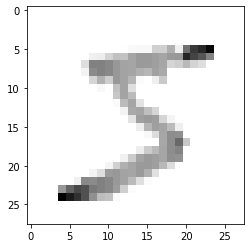

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [18]:
model.save('epic_num_reader.model')

In [24]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [31]:
# predictions = new_model.predict([x_test]) #don't work
# predictions = new_model.predict(x_test) #don't work
predictions = model.predict(x_test) # but it's work

In [32]:
print(predictions)

[[2.50892085e-09 2.66586170e-07 5.25306205e-05 ... 1.20686751e-12
  9.99561219e-13 5.97820025e-13]
 [1.70449752e-07 1.44291975e-04 9.99092698e-01 ... 2.94525993e-14
  1.16592145e-14 3.18568482e-14]
 [1.07430083e-07 9.99495864e-01 2.05001543e-05 ... 3.42387146e-10
  6.16593721e-10 6.43654463e-10]
 ...
 [1.82789591e-07 1.35406083e-07 2.53373400e-07 ... 1.21985746e-11
  3.26896912e-11 1.91030022e-11]
 [4.11958894e-07 7.03374894e-07 4.32234316e-07 ... 3.70507791e-12
  8.13627486e-13 7.86068855e-13]
 [1.17752734e-06 4.54396076e-09 1.38218027e-07 ... 9.86612810e-13
  3.93732545e-13 1.05817026e-12]]


In [33]:
import numpy as np
print(np.argmax(predictions[0]))

7


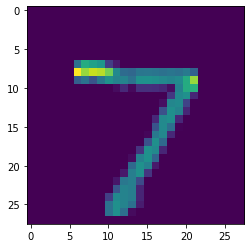

In [35]:
plt.imshow(x_test[0])
plt.show()